In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import speech_recognition as sr
from scipy.io import wavfile 
from scipy.fftpack import fft
from python_speech_features import mfcc, logfbank
import matplotlib.pyplot as plt
#import librosa

In [3]:
#spoken word recognition
recording = sr.Recognizer()
with sr.Microphone() as source: 
    recording.adjust_for_ambient_noise(source)
    print("Please Say something:")
    audio = recording.listen(source)
    try:
        print("You said: \n" + recording.recognize_google(audio))
    except Exception as e:
        print(e)

Please Say something:



Feature Extraction from Speech


In [29]:
def getMFCC(soundFile):
    frequency_sampling, audio_signal = wavfile.read(soundFile)
    features_mfcc = mfcc(audio_signal, frequency_sampling)
    print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
    print('Length of each feature =', features_mfcc.shape[1])
    features_mfcc = features_mfcc.T
    mean_features = features_mfcc.mean(axis = 1)
    return(mean_features)

In [30]:
#get the mfcc's of the hit songs
ilikeit = getMFCC("ILikeIt.wav")
hotboy = getMFCC("HotBoy.wav")
rockstar = getMFCC("Rockstar.wav")
starboy = getMFCC("Starboy.wav")
sunflower = getMFCC("Sunflower.wav")
getmine = getMFCC("GetMine.wav")
atclub = getMFCC("AtTheClub.wav")
finechina = getMFCC("FineChina.wav")


MFCC:
Number of windows = 50702
Length of each feature = 13



MFCC:
Number of windows = 38846
Length of each feature = 13



MFCC:
Number of windows = 43601
Length of each feature = 13



MFCC:
Number of windows = 46216
Length of each feature = 13



MFCC:
Number of windows = 31662
Length of each feature = 13



MFCC:
Number of windows = 37095
Length of each feature = 13



MFCC:
Number of windows = 34991
Length of each feature = 13



MFCC:
Number of windows = 28778
Length of each feature = 13


In [31]:
#get them from the non-hit songs. 
partments = getMFCC("21_Savage_-_Partments_Slaughter_King_2015_+_DOWNLOAD-VbCY_3mWXec.wav")
shake88 = getMFCC("Denzel_Curry_-_SHAKE_88_feat._Sam_Sneak-ltN58roAM5c.wav")
kujo = getMFCC("Denzel_Curry_-_SHAKE_88_feat._Sam_Sneak-ltN58roAM5c.wav")
killedbefore = getMFCC("SongKilledBeforeYoungThug.wav")
hundredround = getMFCC("Lil_Baby_-_100_Round_Feat._Lil_Yachty_Perfect_Timing-i9VbnLXkxeI.wav")


MFCC:
Number of windows = 28824
Length of each feature = 13



MFCC:
Number of windows = 29553
Length of each feature = 13



MFCC:
Number of windows = 29553
Length of each feature = 13



MFCC:
Number of windows = 44149
Length of each feature = 13



MFCC:
Number of windows = 29010
Length of each feature = 13


In [51]:
allSongs = np.stack([ilikeit, hotboy, rockstar, starboy, sunflower, getmine, atclub, finechina, partments, shake88, kujo, killedbefore, hundredround])
finalMFCDF = pd.DataFrame(allSongs)
import pickle
finalMFCDF.to_pickle("mfccDF.pkl")

In [52]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 32A6-5CEF

 Directory of C:\Users\gr8\Documents\STA141C\Project\STA141C_Project\soundAnalysis

06/09/2019  12:18 AM    <DIR>          .
06/09/2019  12:18 AM    <DIR>          ..
06/01/2019  07:09 PM    <DIR>          .ipynb_checkpoints
06/08/2019  07:04 PM        25,423,950 21_Savage_-_Partments_Slaughter_King_2015_+_DOWNLOAD-VbCY_3mWXec.wav
06/08/2019  01:54 PM        30,863,438 AtTheClub.wav
06/08/2019  07:04 PM         9,273,422 DaBaby_-_Kujo-U5rk2qASIOI.wav
06/08/2019  07:04 PM        26,067,022 Denzel_Curry_-_SHAKE_88_feat._Sam_Sneak-ltN58roAM5c.wav
06/08/2019  01:54 PM        25,382,990 FineChina.wav
06/08/2019  01:49 PM        32,718,926 GetMine.wav
06/08/2019  01:36 PM        34,263,118 HotBoy.wav
06/08/2019  01:44 PM        44,720,206 ILikeIt.wav
06/08/2019  01:55 PM        29,495,374 jungle.wav
06/08/2019  07:04 PM        25,587,790 Lil_Baby_-_100_Round_Feat._Lil_Yachty_Perfect_Timing-i9VbnLXkxeI.wav
06/09/2019  12:18 AM 

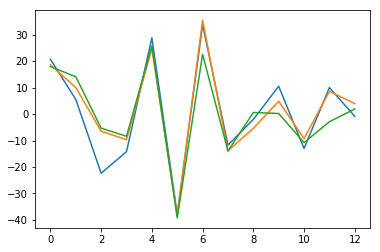

In [39]:
plt.plot(partments)
plt.plot(starboy)
plt.plot(getmine)
plt.show()


In [36]:
filterbank_features = logfbank(audio_signal, frequency_sampling)
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

NameError: name 'audio_signal' is not defined


Signal shape: (21772800,)
Signal Datatype: int16
Signal duration: 987.43 seconds


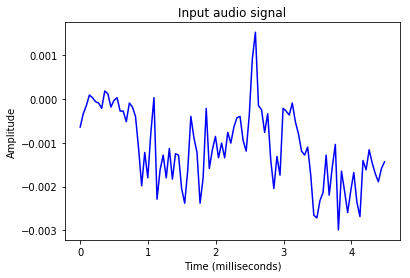

In [50]:
frequency_sampling, audio_signal = wavfile.read("MLKDream.wav")
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')
audio_signal = audio_signal / np.power(2, 15)
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

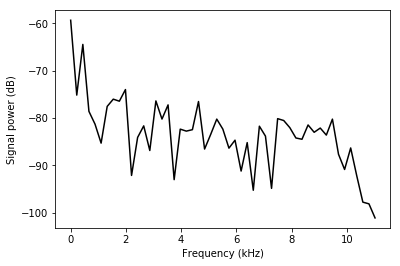

In [58]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)
#fourier transform
signal_frequency = np.fft.fft(audio_signal)
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2
len_fts = len(signal_frequency)
if length_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1:len_fts-1] *= 2
signal_power = 10 * np.log10(signal_frequency)
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

In [ ]:
#monotone audio signal

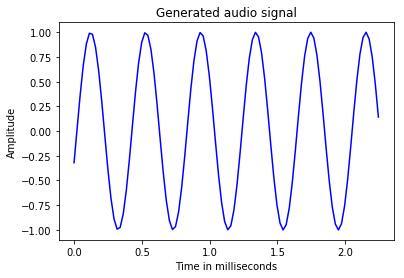

In [67]:
output_file = 'audio_signal_generated.wav'
duration = 12 # in seconds
frequency_sampling = 44100 # in Hz
frequency_tone = 784
min_val = -6 * np.pi
max_val = 6 * np.pi
#step 2
t = np.linspace(min_val, max_val, duration * frequency_sampling)
audio_signal = np.sin(2 * np.pi * frequency_tone * t)

#write(output_file, frequency_sampling, signal_scaled)
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

In [9]:
rate, data = wavfile.read('Starboy.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>